<a href="https://colab.research.google.com/github/AIKevin/machine_learning_with_python/blob/master/multiple_linear_regression_pw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Linear Regression
##PW2
###Sci-Kit Learn

##Table of Contents


1.   Installing Dependencies
2.   Data Loading, Preprocessing and Visualisization
3.   Simple Linear Regression
4.   Multiple Linear Regression



## 1.Installig dependencies

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

##2.Data Loading, Preprocessing and Visualization

**Importing boston dataset**

In [0]:
from sklearn.datasets import load_boston

In [0]:
dataset= load_boston()

**Data Split**

In [0]:
boston=pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston["MEDV"]=dataset.target
msk = np.random.rand(len(boston)) < 0.8
train = boston[msk]
test = boston[~msk]
print(type(boston))

<class 'pandas.core.frame.DataFrame'>


We already have explored this dataset in the last practical work.

**Correlation**

In [0]:
np.corrcoef(train["MEDV"],train["AGE"])

array([[ 1.        , -0.38424333],
       [-0.38424333,  1.        ]])

Correlation is quite low. Therefore we can conclude there is no linear realtionship between them.

In [0]:
np.corrcoef(train["MEDV"],train["LSTAT"])

array([[ 1.        , -0.74526483],
       [-0.74526483,  1.        ]])

Let's try a model with these parameters.

## 3.Simple Linear Regression

In [0]:
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[["AGE"]])
train_y = np.asanyarray(train[["MEDV"]])
regr1.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[-0.12154061]]
Intercept:  [30.75681326]


Text(0, 0.5, 'MEDV')

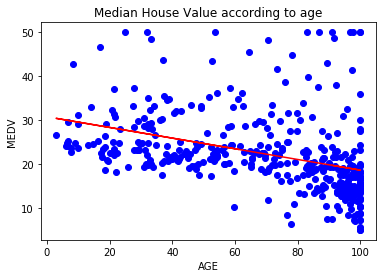

In [0]:
plt.scatter(train[["AGE"]], train[["MEDV"]],  color='blue')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r')
plt.title("Median House Value according to age")
plt.xlabel("AGE")
plt.ylabel("MEDV")

## 4.Multiple Linear Regression

Let's use another combination of parameters. We will use 2 predictors. We apply a log on the LSTAT predictor.

In [0]:
regr2 = linear_model.LinearRegression()
train[["LOGLSTAT"]]=np.log(train[["LSTAT"]])
train_x = np.asanyarray(train[["AGE","LOGLSTAT"]])
train_y = np.asanyarray(train[["MEDV"]])
regr2.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[  0.06105677 -14.17230033]]
Intercept:  [52.00530796]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Let's try with every variables.

In [0]:
train = boston[msk]
test = boston[~msk]
regr3 = linear_model.LinearRegression()
#train[["LOGLSTAT"]]=np.log(train[["LSTAT"]])
#train.drop(["LSTAT"], axis=1)
train_x = np.asanyarray(train.loc[:,train.columns!="MEDV"])
train_y = np.asanyarray(train[["MEDV"]])
regr3.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

Coefficients:  [[-1.16910971e-01  3.32297361e-02 -1.25963666e-02  2.16304489e+00
  -1.66919137e+01  3.86259360e+00  4.47837936e-03 -1.43900750e+00
   3.01893705e-01 -1.25272198e-02 -7.94419603e-01  9.96673343e-03
  -5.45569207e-01]]
Intercept:  [32.92295983]


Now with every parameters but LSTAT replaced by log(LSTAT)

In [0]:
train = boston[msk]
test = boston[~msk]
regr4 = linear_model.LinearRegression()
train[["LOGLSTAT"]]=np.log(train[["LSTAT"]])
train=train.drop(["LSTAT"], axis=1)
print(train.columns)
train_x = np.asanyarray(train.loc[:,train.columns!="MEDV"])
train_y = np.asanyarray(train[["MEDV"]])
regr4.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr4.coef_)
print ('Intercept: ',regr4.intercept_)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'MEDV', 'LOGLSTAT'],
      dtype='object')
Coefficients:  [[-1.41947583e-01  1.51409348e-02 -1.89769421e-02  1.89613984e+00
  -1.52324410e+01  2.55526729e+00  2.95203660e-02 -1.21759484e+00
   2.74788640e-01 -1.02108359e-02 -7.16811013e-01  7.70368727e-03
  -9.29362534e+00]]
Intercept:  [52.0050974]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


**Correlation of every parameters**

In [0]:
train = boston[msk]
test = boston[~msk]
train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.208601,0.434024,-0.063198,0.451428,-0.243979,0.375400,-0.397449,0.668537,0.616245,0.306824,-0.426970,0.449709,-0.404819
ZN,-0.208601,1.000000,-0.517159,-0.024334,-0.503862,0.291278,-0.547891,0.656165,-0.307979,-0.310532,-0.401095,0.166062,-0.401085,0.324613
INDUS,0.434024,-0.517159,1.000000,0.041468,0.754697,-0.427202,0.620601,-0.691217,0.600260,0.738248,0.413298,-0.343374,0.614629,-0.519943
CHAS,-0.063198,-0.024334,0.041468,1.000000,0.070603,0.018257,0.069418,-0.077836,-0.030288,-0.064049,-0.113042,0.070725,-0.016697,0.123501
NOX,0.451428,-0.503862,0.754697,0.070603,1.000000,-0.326268,0.726863,-0.766248,0.603322,0.658933,0.194871,-0.361316,0.601904,-0.446659
RM,-0.243979,0.291278,-0.427202,0.018257,-0.326268,1.000000,-0.251128,0.212200,-0.221156,-0.320097,-0.334626,0.099029,-0.602357,0.692284
AGE,0.375400,-0.547891,0.620601,0.069418,0.726863,-0.251128,1.000000,-0.742229,0.446850,0.502189,0.278047,-0.266647,0.611731,-0.384243
DIS,-0.397449,0.656165,-0.691217,-0.077836,-0.766248,0.212200,-0.742229,1.000000,-0.489261,-0.535866,-0.238640,0.276580,-0.495112,0.248014
RAD,0.668537,-0.307979,0.600260,-0.030288,0.603322,-0.221156,0.446850,-0.489261,1.000000,0.903922,0.458059,-0.459801,0.459453,-0.379778
TAX,0.616245,-0.310532,0.738248,-0.064049,0.658933,-0.320097,0.502189,-0.535866,0.903922,1.000000,0.475726,-0.445038,0.533909,-0.487506


Let's use a function that plot our data relations in multiples scatterplots, to see datasets distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72705081d0>,
      dtype=object)

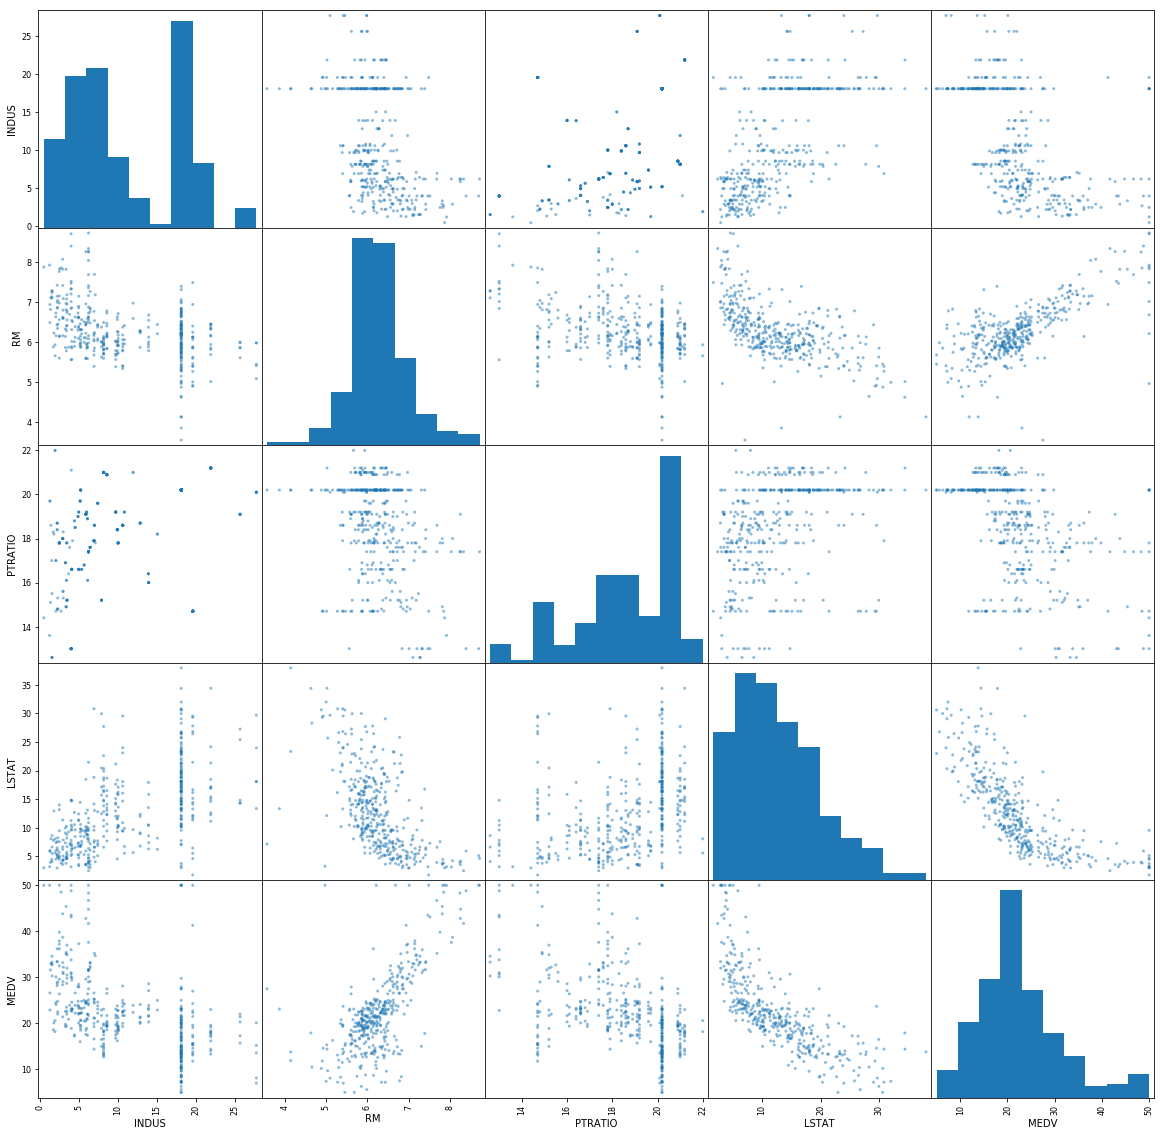

In [0]:
trainplot=train.drop(['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX','B'], axis=1)
pd.plotting.scatter_matrix(trainplot, figsize=(20, 20))

**Plot of the correlation Matrix (more graphic)**

In [0]:
corr=train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.21,0.43,-0.063,0.45,-0.24,0.38,-0.4,0.67,0.62,0.31,-0.43,0.45,-0.4
ZN,-0.21,1,-0.52,-0.024,-0.5,0.29,-0.55,0.66,-0.31,-0.31,-0.4,0.17,-0.4,0.32
INDUS,0.43,-0.52,1,0.041,0.75,-0.43,0.62,-0.69,0.6,0.74,0.41,-0.34,0.61,-0.52
CHAS,-0.063,-0.024,0.041,1,0.071,0.018,0.069,-0.078,-0.03,-0.064,-0.11,0.071,-0.017,0.12
NOX,0.45,-0.5,0.75,0.071,1,-0.33,0.73,-0.77,0.6,0.66,0.19,-0.36,0.6,-0.45
RM,-0.24,0.29,-0.43,0.018,-0.33,1,-0.25,0.21,-0.22,-0.32,-0.33,0.099,-0.6,0.69
AGE,0.38,-0.55,0.62,0.069,0.73,-0.25,1,-0.74,0.45,0.5,0.28,-0.27,0.61,-0.38
DIS,-0.4,0.66,-0.69,-0.078,-0.77,0.21,-0.74,1,-0.49,-0.54,-0.24,0.28,-0.5,0.25
RAD,0.67,-0.31,0.6,-0.03,0.6,-0.22,0.45,-0.49,1,0.9,0.46,-0.46,0.46,-0.38
TAX,0.62,-0.31,0.74,-0.064,0.66,-0.32,0.5,-0.54,0.9,1,0.48,-0.45,0.53,-0.49


In [0]:
train = boston[msk]
test = boston[~msk]
regr5 = linear_model.LinearRegression()
train[["LOGLSTAT"]]=np.log(train[["LSTAT"]])
train=train.drop(["LSTAT","TAX"], axis=1)
print(train.columns)
train_x = np.asanyarray(train.loc[:,train.columns!="MEDV"])
train_y = np.asanyarray(train[["MEDV"]])
regr5.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr5.coef_)
print ('Intercept: ',regr5.intercept_)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'MEDV', 'LOGLSTAT'],
      dtype='object')
Coefficients:  [[-1.38229081e-01  5.39930621e-03 -9.68076374e-02  2.25184924e+00
  -1.55619136e+01  2.62620320e+00  2.88184682e-02 -1.20134355e+00
   1.35749586e-01 -7.54082318e-01  7.82720678e-03 -9.36200955e+00]]
Intercept:  [50.62113958]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


## 5.Evaluation

In [0]:
from sklearn.metrics import r2_score

test[["LOGLSTAT"]]=np.log(test[["LSTAT"]])
test=test.drop(["LSTAT","TAX"], axis=1)
test_x = np.asanyarray(test.loc[:,test.columns!="MEDV"])
test_y = np.asanyarray(test[["MEDV"]])
y_hat = regr5.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 3.49
Residual sum of squares (MSE): 24.70
R2-score: 0.69


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


This Model has a very good precision.

## 6.ANOVA (ANalysis Of VAriance)

Let's count values of the CHAS column

In [0]:
pd.value_counts(train.CHAS)

0.0    378
1.0     26
Name: CHAS, dtype: int64

**BoxPlot**

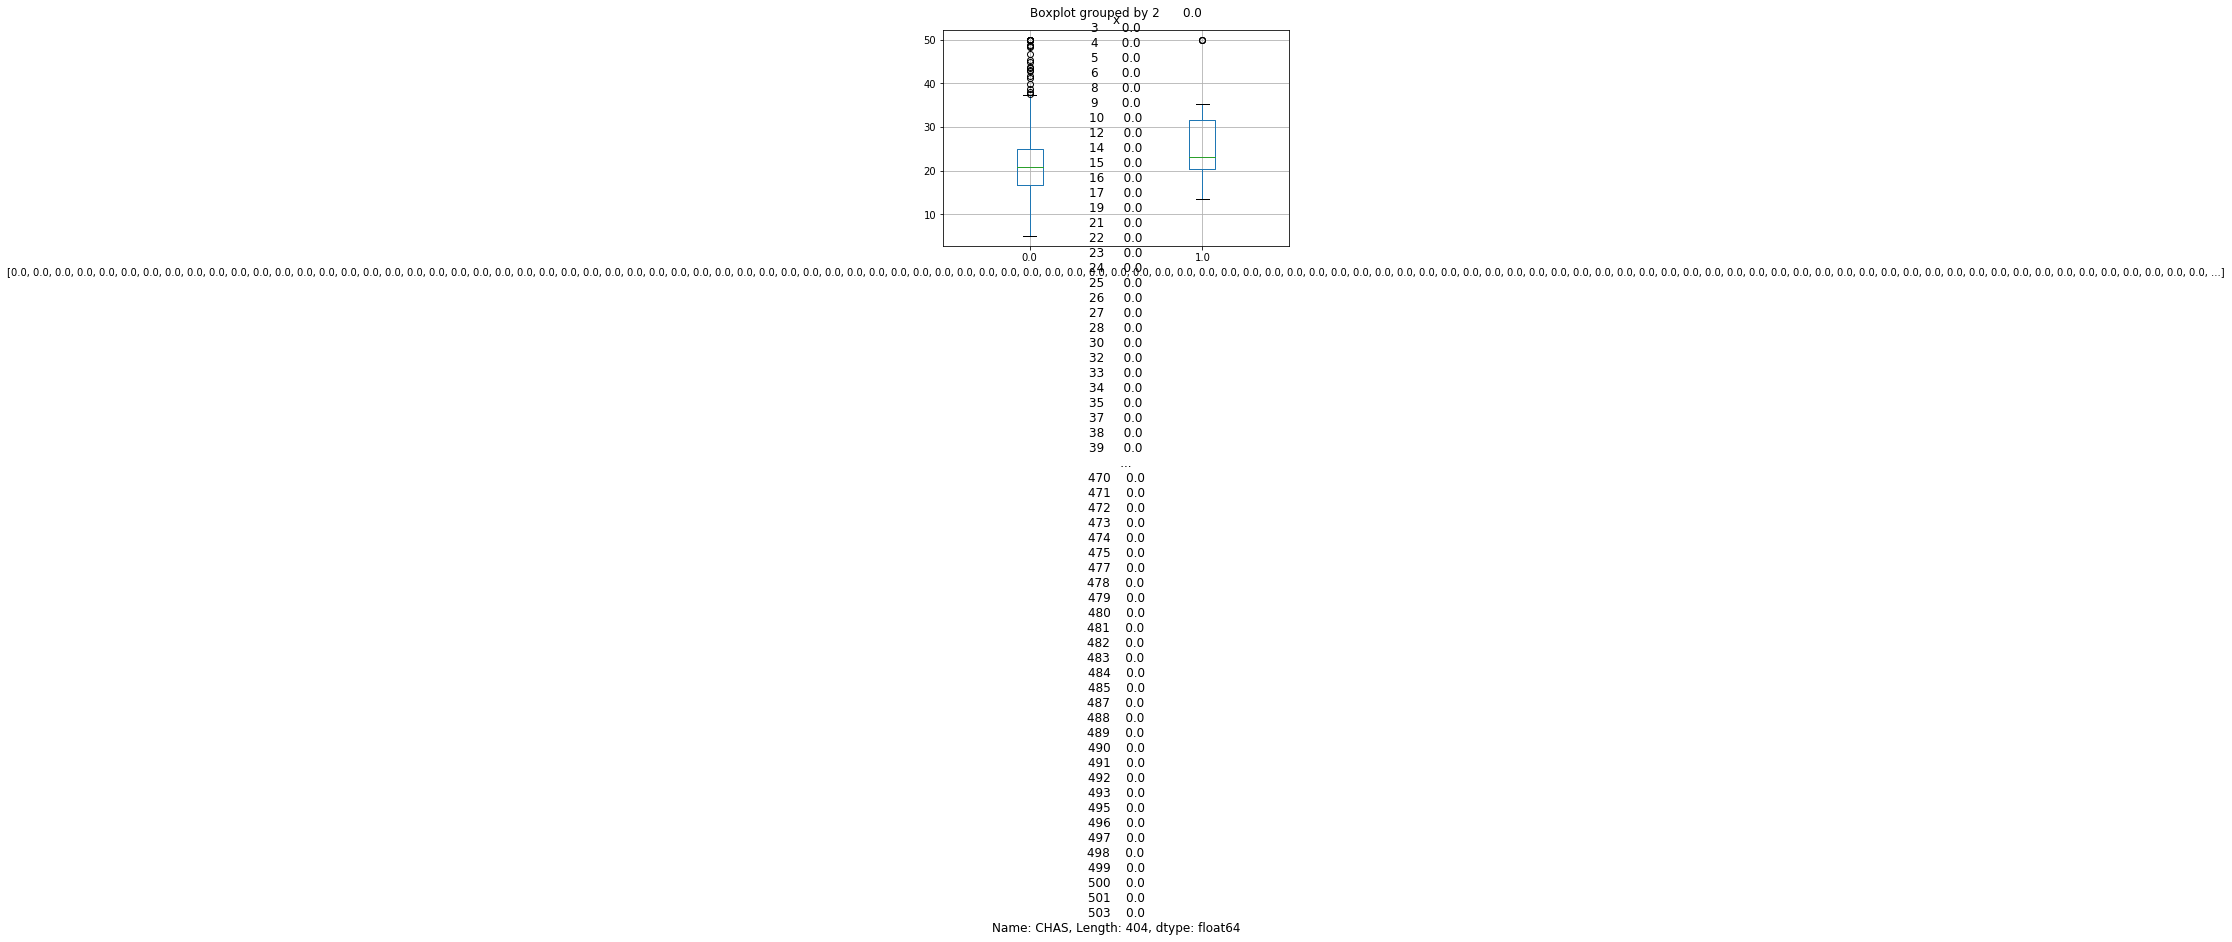

In [0]:
pd.DataFrame.boxplot(train["MEDV"], by=train["CHAS"])

Let's plot the mean of the MEDV group by their CHAS.

In [0]:
train.groupby('CHAS')['MEDV'].mean()

CHAS
0.0    22.146032
1.0    26.646154
Name: MEDV, dtype: float64

ANOVA Computation

In [0]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [0]:
mod=ols("MEDV~CHAS", data=train).fit()
table = sm.stats.anova_lm(mod, typ=2)
print(table)

                sum_sq     df         F    PR(>F)
CHAS        492.643070    1.0  6.226494  0.012985
Residual  31806.423663  402.0       NaN       NaN


**Linear Regression with other parameters.**

In [0]:
train = boston[msk]
test = boston[~msk]
regr6 = linear_model.LinearRegression()
print(train.columns)
train_x = np.asanyarray(train[["CHAS","CRIM"]])
train_y = np.asanyarray(train[["MEDV"]])
regr6.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr6.coef_)
print ('Intercept: ',regr6.intercept_)

test_x = np.asanyarray(test[["CHAS", "CRIM"]])
test_y = np.asanyarray(test[["MEDV"]])
y_hat = regr6.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Coefficients:  [[ 3.58220789 -0.45188795]]
Intercept:  [23.79077992]
Mean absolute error: 6.48
Residual sum of squares (MSE): 86.03
R2-score: -2.32


In [0]:
train = boston[msk]
test = boston[~msk]
train[["AGE*LSTAT"]]=np.multiply(train[["LSTAT"]],train[["AGE"]])
regr7 = linear_model.LinearRegression()
print(train.columns)
train_x = np.asanyarray(train[["AGE*LSTAT"]])
train_y = np.asanyarray(train[["MEDV"]])
regr7.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr7.coef_)
print ('Intercept: ',regr7.intercept_)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'AGE*LSTAT'],
      dtype='object')
Coefficients:  [[-0.00761266]]
Intercept:  [30.00394938]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Let's try a model with the some other variables.

In [0]:
train = boston[msk]
test = boston[~msk]
regr6 = linear_model.LinearRegression()
train[["LOGLSTAT"]]=np.log(train[["LSTAT"]])
#We drop the columns we don't want to use
train=train.drop(["LSTAT","TAX","DIS"], axis=1)

train_x = np.asanyarray(train.loc[:,train.columns!="MEDV"])
train_y = np.asanyarray(train[["MEDV"]])
regr6.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr6.coef_)
print ('Intercept: ',regr6.intercept_)

test[["LOGLSTAT"]]=np.log(test[["LSTAT"]])
#We drop the columns we don't want to use
test=test.drop(["LSTAT","TAX","DIS"], axis=1)
print(test.columns)
print(train.columns)
test_x = np.asanyarray(test.loc[:,test.columns!="MEDV"])
test_y = np.asanyarray(test[["MEDV"]])
y_hat = regr6.predict(test_x)
print(train_x.shape)
print(test_x.shape)
print(y_hat-test_y)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Coefficients:  [[-1.11845512e-01 -2.94496024e-02 -1.91074271e-02  2.37223303e+00
  -8.92429933e+00  2.87604064e+00  5.50494289e-02  1.35325647e-01
  -8.37626607e-01  8.23041871e-03 -9.80614978e+00]]
Intercept:  [40.9245404]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO',
       'B', 'MEDV', 'LOGLSTAT'],
      dtype='object')
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO',
       'B', 'MEDV', 'LOGLSTAT'],
      dtype='object')
(404, 11)
(102, 11)
[[  8.89072522]
 [  4.7412286 ]
 [ -6.0846479 ]
 [  4.51979881]
 [  1.5217688 ]
 [ -5.39661893]
 [ -0.16628404]
 [  0.58571009]
 [  5.15386065]
 [  0.35422392]
 [  2.64216503]
 [ -1.73663759]
 [  0.47505224]
 [ -5.15390195]
 [  2.22835479]
 [  0.05499645]
 [ -1.36899934]
 [ -0.33488232]
 [  1.50699271]
 [  1.76708688]
 [ -2.76900314]
 [  9.70278945]
 [  2.71611612]
 [ -1.75592646]
 [ -3.92420025]
 [ -2.09707764]
 [ -0.51227213]
 [ -1.8113127 ]
 [ -6.6904123 ]
 [ -1.56072632]
 [  3.91395933

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
